# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Ilustração-da-convolução-como-uma-média-ponderada-de-translações-da-imagem-de-entrada" data-toc-modified-id="Ilustração-da-convolução-como-uma-média-ponderada-de-translações-da-imagem-de-entrada-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ilustração da convolução como uma média ponderada de translações da imagem de entrada</a></div><div class="lev2 toc-item"><a href="#Equação" data-toc-modified-id="Equação-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Equação</a></div><div class="lev2 toc-item"><a href="#Ilustração-da-convolução-1D" data-toc-modified-id="Ilustração-da-convolução-1D-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Ilustração da convolução 1D</a></div><div class="lev2 toc-item"><a href="#Ilustração-da-convolução-2D" data-toc-modified-id="Ilustração-da-convolução-2D-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Ilustração da convolução 2D</a></div><div class="lev2 toc-item"><a href="#Ilustração-com-imagem" data-toc-modified-id="Ilustração-com-imagem-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Ilustração com imagem</a></div>

# Ilustração da convolução como uma média ponderada de translações da imagem de entrada

O objetivo desta demonstração é ilustrar a implementação da convolução discreta linear utilizando
o algoritmo da média ponderada das translações da imagem. Esta implementação é apropriada para o
NumPy pois as translações são implementadas na forma de fatiamento

A função da convolução está implementada em:

- [ia898:conv](../../ia898/src/conv.ipynb)

## Equação

$$ \begin{matrix}
    (f \ast h)(r,c) &=&  \sum_{i=0}^{H-1} \sum_{j=0}^{W-1} f_{e}(i,j) h_{e}(r-i, c-j) \\
    f_{e}(r,c) &=& \left\{ \begin{array}{llcl} f(r,c), & 0 \leq r \leq H_{f}-1 & and & 0 \leq r \leq W_f-1  \\
                                                         0, & H_f \leq r \leq H-1 & or & W_f \leq c \leq W-1 \end{array}\right.\\
    h_{e}(r,c) &=& \left\{ \begin{array}{llcl} f(r,c), & 0 \leq r \leq H_{h}-1 & and & 0 \leq r \leq W_h-1  \\
                                                         0, & H_h \leq r \leq H-1 & or & W_h \leq c \leq W-1 \end{array}\right.\\
    H & \geq & H_f + H_h - 1 \\
    W & \geq & W_f + W_h - 1
    \end{matrix} $$
    

In [4]:
# reprodução do ia898:conv com alterações para ilustrar o tutorial
import numpy as np
import sys,os
ia898path = os.path.abspath('../../')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia


def iaconvdemo(f,h):
    f, h = np.asarray(f), np.asarray(h,float)
    if len(f.shape) == 1: f = f[np.newaxis,:]
    if len(h.shape) == 1: h = h[np.newaxis,:]
    if f.size < h.size:
        f, h = h, f
    g = np.zeros(np.array(f.shape) + np.array(h.shape) - 1)
    
          
    if f.ndim == 2:
        H,W = f.shape
        #for (r,c) in np.transpose(np.nonzero(h)):
        #   g[r:r+H, c:c+W] += f * h[r,c]
        
    if f.ndim == 3:
        D,H,W = f.shape
        #for (d,r,c) in np.transpose(np.nonzero(h)):
        #   g[d:d+D, r:r+H, c:c+W] += f * h[d,r,c]

    mask_h = np.zeros(h.shape,dtype = bool)
    mask_g = np.zeros(g.shape,dtype = bool)


    for i in np.arange(h.shape[0]):
        for j in np.arange(h.shape[1]):
            g[i:i+f.shape[0], j:j+f.shape[1]] += h[i,j] * f
            mask_h[i,j] = True
            mask_g[i:i+f.shape[0], j:j+f.shape[1]] = True
            print('iteração ',(i,j),':')
            print('mascara da imagem de saida:\n', mask_g)
            print('mascara de h:\n', mask_h, '\nitem de h sendo utilizado:\n',h[mask_h])
            print('h*f dessa iteração:\n',h[i,j] * f)
            print('imagem de saida acumulada:\n', g)
            print('\n')
            
            mask_h[i,j] = False
            mask_g[i:i+f.shape[0], j:j+f.shape[1]] = False

    return g



## Ilustração da convolução 1D

Esta primeira ilustração, temos uma imagem unidimensional com 6 elementos e o núcleo da convolução com 3 elementos. O resultado
da convolução terá 8 elementos. Acompanhe o passo a passo da execução do algoritmo. O algoritmo original é o `ia898:conv` que foi trazido para esta página e incorporado visualizações ilustrativas durante a sua execução.

In [5]:
import numpy as np

f = np.array([0,1,2,3,4,5])
h = np.array([-1,0,1])
   
print('f =\n', f)
print('\nh = \n', h)
print('\n')

print('\n f*h = \n',iaconvdemo(f, h) )


f =
 [0 1 2 3 4 5]

h = 
 [-1  0  1]


iteração  (0, 0) :
mascara da imagem de saida:
 [[ True  True  True  True  True  True False False]]
mascara de h:
 [[ True False False]] 
item de h sendo utilizado:
 [-1.]
h*f dessa iteração:
 [[-0. -1. -2. -3. -4. -5.]]
imagem de saida acumulada:
 [[ 0. -1. -2. -3. -4. -5.  0.  0.]]


iteração  (0, 1) :
mascara da imagem de saida:
 [[False  True  True  True  True  True  True False]]
mascara de h:
 [[False  True False]] 
item de h sendo utilizado:
 [ 0.]
h*f dessa iteração:
 [[ 0.  0.  0.  0.  0.  0.]]
imagem de saida acumulada:
 [[ 0. -1. -2. -3. -4. -5.  0.  0.]]


iteração  (0, 2) :
mascara da imagem de saida:
 [[False False  True  True  True  True  True  True]]
mascara de h:
 [[False False  True]] 
item de h sendo utilizado:
 [ 1.]
h*f dessa iteração:
 [[ 0.  1.  2.  3.  4.  5.]]
imagem de saida acumulada:
 [[ 0. -1. -2. -2. -2. -2.  4.  5.]]



 f*h = 
 [[ 0. -1. -2. -2. -2. -2.  4.  5.]]


## Ilustração da convolução 2D

Temos o caso de imagem bidimensional sendo processada por uma máscara Sobel de cálculo de gradiente horizontal. Acompanhe o passo-a-passo:

In [6]:
import numpy as np
f = np.array([[1,1,1,1,1],
            [2,2,2,2,2],
            [3,3,3,3,3],
            [4,4,4,4,4],
            [5,5,5,5,5]])
h = np.array([[-1,0,1],
            [-2,0,2],
            [-1,0,1]])
   
print('f =\n', f)
print('\nh = \n', h)
print('\n')

print('\n f*h = \n',iaconvdemo(f, h) )

f =
 [[1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]
 [5 5 5 5 5]]

h = 
 [[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


iteração  (0, 0) :
mascara da imagem de saida:
 [[ True  True  True  True  True False False]
 [ True  True  True  True  True False False]
 [ True  True  True  True  True False False]
 [ True  True  True  True  True False False]
 [ True  True  True  True  True False False]
 [False False False False False False False]
 [False False False False False False False]]
mascara de h:
 [[ True False False]
 [False False False]
 [False False False]] 
item de h sendo utilizado:
 [-1.]
h*f dessa iteração:
 [[-1. -1. -1. -1. -1.]
 [-2. -2. -2. -2. -2.]
 [-3. -3. -3. -3. -3.]
 [-4. -4. -4. -4. -4.]
 [-5. -5. -5. -5. -5.]]
imagem de saida acumulada:
 [[-1. -1. -1. -1. -1.  0.  0.]
 [-2. -2. -2. -2. -2.  0.  0.]
 [-3. -3. -3. -3. -3.  0.  0.]
 [-4. -4. -4. -4. -4.  0.  0.]
 [-5. -5. -5. -5. -5.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]]


iteração  (0, 1) :
m

## Ilustração com imagem

Reprodução da mascara Sobel utilizada acima em uma imagem para ilustrar o seu comportamento

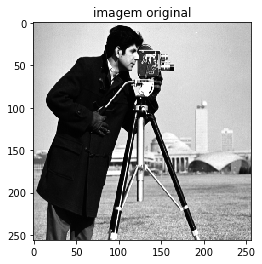

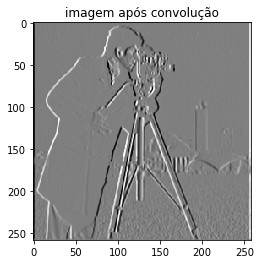

In [8]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys,os
os.chdir('../data')
f = mpimg.imread('cameraman.tif')
plt.imshow(f, cmap='gray')
plt.title('imagem original')
plt.show()

h = np.array([[-1,0,1],
            [-2,0,2],
            [-1,0,1]])

g = ia.conv(f,h)

plt.imshow(g, cmap='gray')
plt.title('imagem após convolução')
plt.show()

